This mini project is based on the IBM coursera course "Machine Learning with Python", for my own learning

##Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

##Attaining the data

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

df = pd.read_csv(url) #Read URL data using Pandas

##Making sure the data has been loaded properly

In [4]:
df.head(10) #Output the 10 first rows of the dataframe

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


##Showing a statistical description of the data and data types in the dataframe

In [5]:
df.describe() #Use describe function to see statistics on columns with numerical data types

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


##Visualising linear relationship between the total fuel consuption and other numerical columns

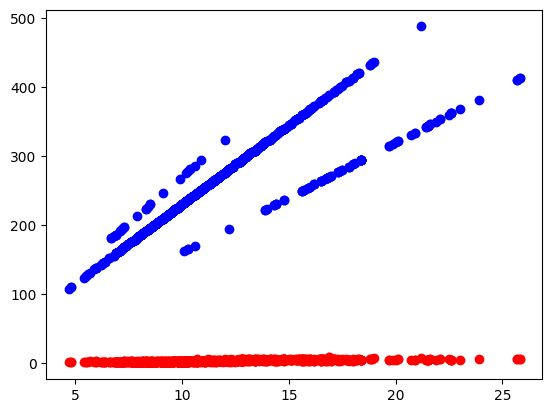

In [16]:
grph = df[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS','ENGINESIZE']] #Take relevant columns from the dataframe

plt.scatter(grph.FUELCONSUMPTION_COMB,grph.CO2EMISSIONS, color = "blue" ) #Plot CO2 emissions as a function of fuel consumption
plt.scatter(grph.FUELCONSUMPTION_COMB,grph.ENGINESIZE, color = "red" ) #Plot the engine size as a function of fuel consumption

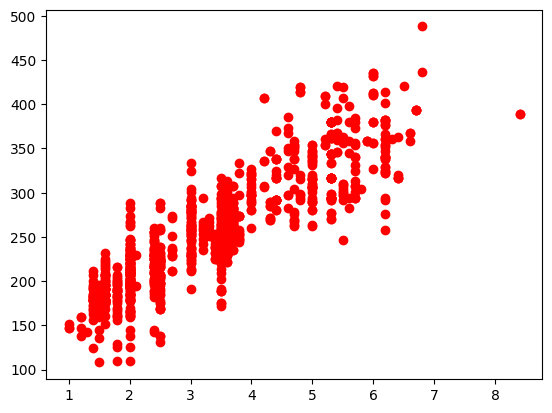

In [30]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color = "red") #Plot co2 emissions as a function of the size of the engine

##Splitting the data to train and test sets to create a regression model (sklearn)

In [43]:
x_axis = df.CO2EMISSIONS.to_numpy() #Turn the featurers into a Numpy array for quick calculations

y_axis = df.ENGINESIZE.to_numpy()

In [44]:
from sklearn.model_selection import train_test_split #Import the function train_test_split, to split the data to a train and test set


x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size = 0.33, random_state = 9) #Save the train and test sets

x_train = x_train.reshape(-1,1) #Reshape x_train, because the linear_model fit function cannot recieve a one dimensional array, but rather a 2 dimensional array

x_test = x_test.reshape(-1,1) #Reshape x_test just like x_train

In [45]:
from sklearn import linear_model #Import linear_model


line = linear_model.LinearRegression() #Get the LinearRegression option


line.fit(x_train, y_train) #Use the fit function on the x_train and y_train

LinearRegression()

In [46]:
print("Coefficient b_1:", line.coef_[0]) #printing the coefficient (tangent)

print("Intercept Value b_0", line.intercept_) #printint the intercept (y value when x = 0)

b_1 = line.coef_[0]

b_0 = line.intercept_


Coefficient b_1: 0.01949224758711606
Intercept Value b_0 -1.6402192733353407


##Visualising the regression model on the trained set

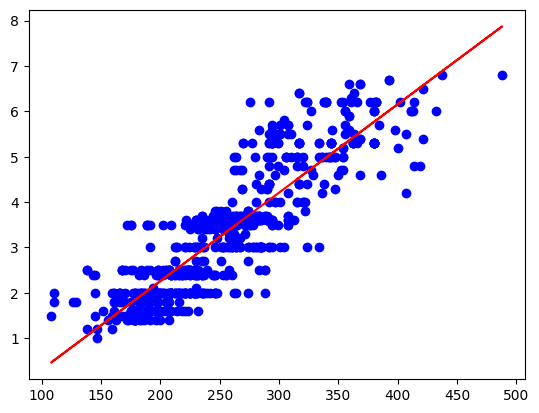

In [47]:
plt.scatter(x_train,y_train, color = "blue")
plt.plot(x_train, b_0 + x_train * b_1, '-r')

##Visualising the regression model on the test set

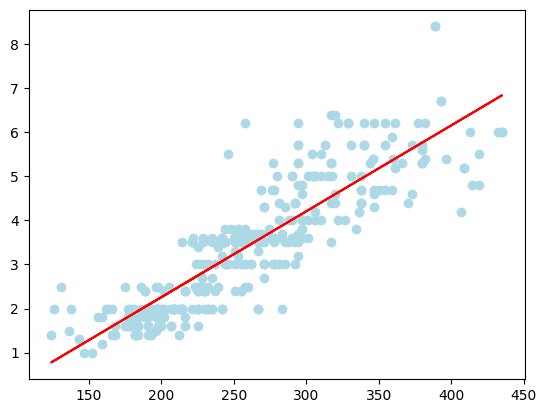

In [48]:
plt.scatter(x_test, y_test, color = "lightblue")
plt.plot(x_test, b_0 + b_1 * x_test, '-r')

##Evaluating the model

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = line.predict(x_test)

print("MSE: ", mean_squared_error(y_pred, y_test)) #Print MSE value

print("MAE: ", mean_absolute_error(y_pred, y_test)) #Print MAE value

print("r^2: ", r2_score(y_pred, y_test)) #Print r^2

MSE:  0.4987565145784292
MAE:  0.5492764998716684
r^2:  0.6839134152515294


##Conclusion

We can see that both the MSE and MAE are relatively low. Despite that, the r^2 value is not high low, suggesting that the simple linear model is not a good model, meaning we cannot predict the engine size accurately enough soley with the CO2 emissions